# Proyecto
## Integrantes
- Juan Sebastian Ospina
- Juan Carlos Baez
- Dataset:  [Internet Firewall Data Set](https://archive.ics.uci.edu/ml/datasets/Internet+Firewall+Data)

### Entender el negocio
El dataset trata sobre los firewall, aquí podremos encontrar información sobre que acción toma un firewall
### Entender el dataset
- Estructura:
    - Cada registro se refiere a una conexión
- Atributos:
    - Source Port: Hace referencia al puerto de origen 
    - Destination Port: Hace referencia al puerto de destino
    - NAT Source Port: Hace referencia al puerto de origen de la NAT
    - NAT Destination Port: Hace referencia al puerto de destino de la NAT
    - Action: Accion que toma el firewall (Clase del dataset)
    - Bytes: Bytes presentes en la conexion
    - Bytes Sent: Bytes enviados en la conexion
    - Bytes Received: Bytes recibidos en la conexion
    - Packets: paquetes presentes en la conexion
    - Elapsed Time (sec): tiempo transcurrido en la conexion
    - pkts_sent: Paquetes enviados en la conexion
    - pkts_received: Paquetes recibidos en la conexion
- Clase:
    - La clase a tomar será action, la cual es la accion que toma el firewall sobre la conexion, las acciones son:
        - acepta (allow)
        - deniega (drop)
        - resetea cliente o resetear server (action)
        - resetea ambos (reset-both)

In [69]:
# Importaciones
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Exploracion del dataset

In [2]:
# Carga del dataset
filename1 = 'Firewall.csv'
data = pd.read_csv(filename1)
data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


Feature: Source Port


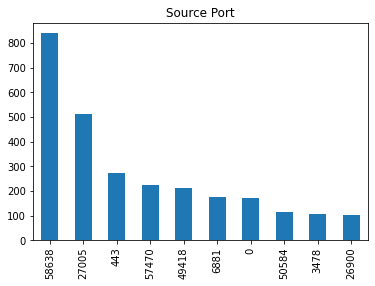

Feature: Destination Port


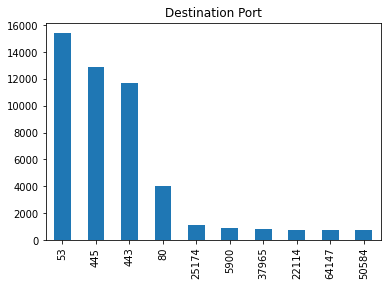

Feature: NAT Source Port


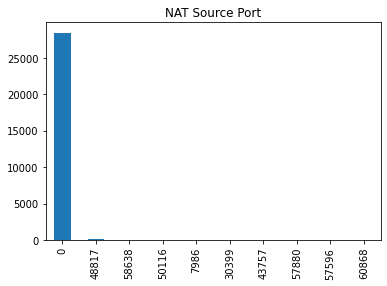

Feature: NAT Destination Port


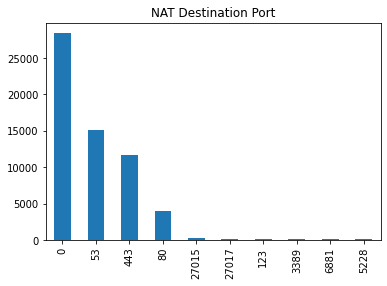

In [8]:
# Atributos Categoricos
# Codigo adaptado de https://www.kaggle.com/code/docxian/internet-firewall-analysis
features_cat = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']
for f in features_cat:
    print('Feature:', f)
    data[f].value_counts()[0:10].plot(kind='bar')
    plt.title(f)
    plt.show()

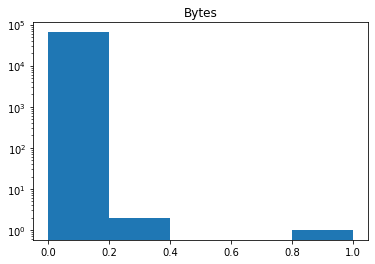

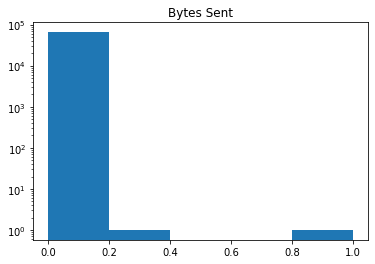

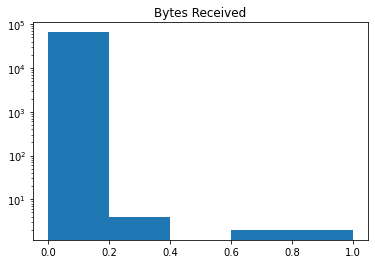

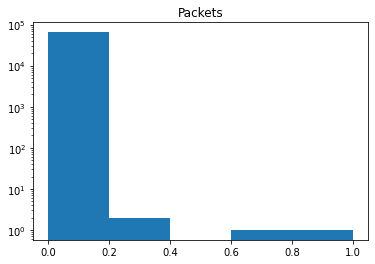

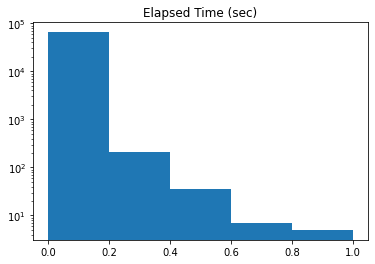

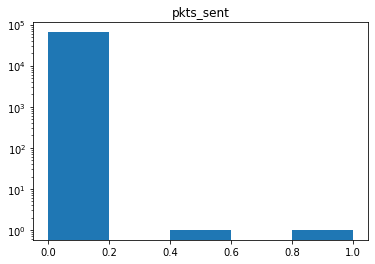

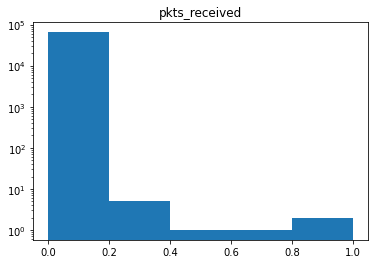

In [9]:
# Atributos numericos
# Codigo adaptado de https://www.kaggle.com/code/docxian/internet-firewall-analysis,
# https://matplotlib.org/3.5.0/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py,
# https://www.delftstack.com/es/howto/python-pandas/pandas-normalize/
features_num = ['Bytes', 'Bytes Sent', 'Bytes Received',
                'Packets', 'Elapsed Time (sec)', 
                'pkts_sent', 'pkts_received']
def minmax_norm(x):
    return (x - x.min()) / ( x.max() - x.min())
for f in features_num:
    normalized_data=minmax_norm(data[f])
    plt.hist(normalized_data,bins=5,log=True)
    plt.title(f)
    plt.show()

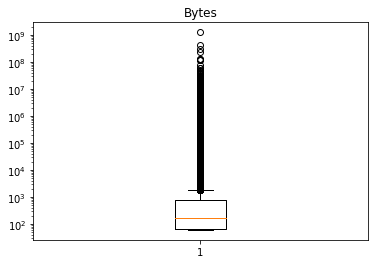

<Figure size 288x288 with 0 Axes>

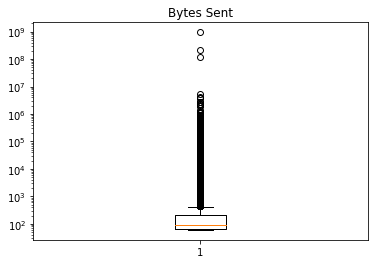

<Figure size 288x288 with 0 Axes>

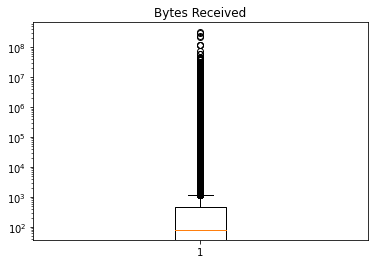

<Figure size 288x288 with 0 Axes>

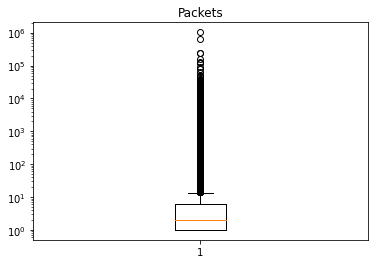

<Figure size 288x288 with 0 Axes>

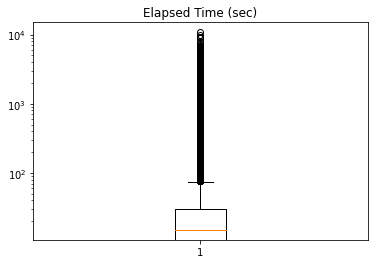

<Figure size 288x288 with 0 Axes>

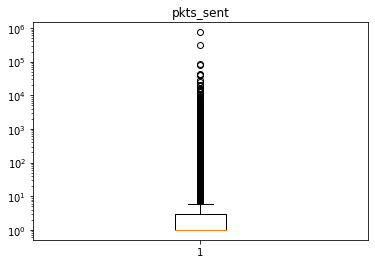

<Figure size 288x288 with 0 Axes>

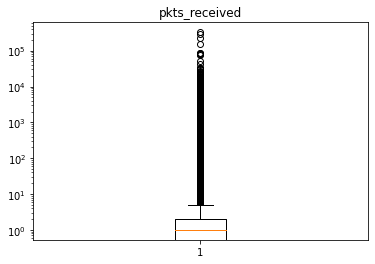

<Figure size 288x288 with 0 Axes>

In [10]:
# Boxplots
# Codigo adaptado de https://www.kaggle.com/code/docxian/internet-firewall-analysis,
# https://stackoverflow.com/questions/34608613/matplotlib-boxplot-calculated-on-log10-values-but-shown-in-logarithmic-scale
for f in features_num:
    plt.boxplot(data[f])
    plt.yscale('log')
    plt.title(f)
    plt.figure(figsize=(4,4))
    plt.show()

Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64


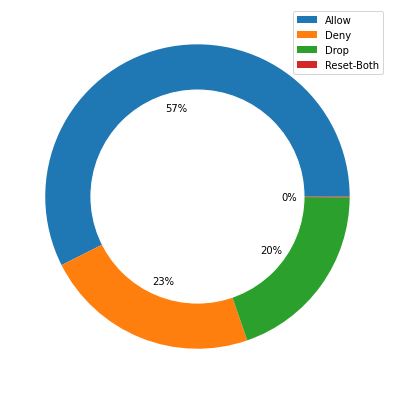

In [11]:
# Clase
# Codigo adaptado de https://es.acervolima.com/grafico-de-anillos-usando-matplotlib-en-python/,
# https://stackoverflow.com/questions/29786807/how-to-make-a-pie-chart-smaller-with-matplotlib
print(data.groupby('Action')['Action'].count())
labels = ["Allow","Deny","Drop","Reset-Both"]
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(data.groupby('Action')['Action'].count(),autopct="%1.0f%%")
plt.legend(labels, loc="upper right")
p = plt.gcf()
p.set_size_inches(7,7)
p.gca().add_artist(my_circle)

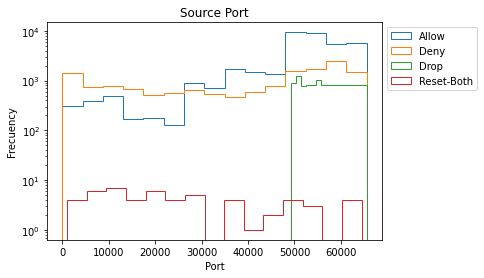

<Figure size 432x432 with 0 Axes>

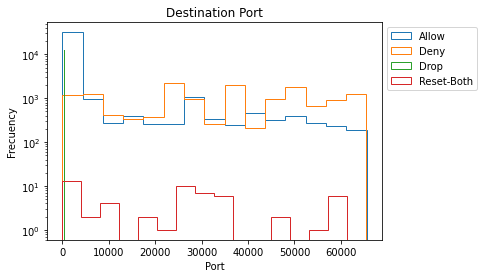

<Figure size 432x432 with 0 Axes>

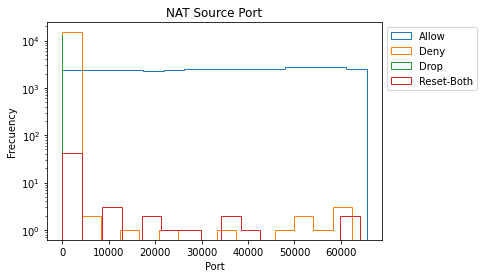

<Figure size 432x432 with 0 Axes>

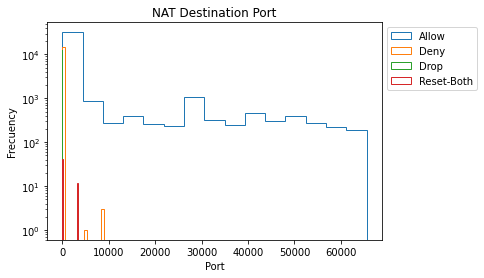

<Figure size 432x432 with 0 Axes>

In [61]:
# Categoricos vs Clase
# Codigo adaptado de,
# https://stackoverflow.com/questions/43872450/matplotlib-histogram-with-multiple-legend-entries,
# https://www.delftstack.com/es/howto/seaborn/seaborn-legend-position,
# https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html
for f in features_cat:
    plt.hist(data[data["Action"] == "allow"][f],histtype='step',log=True,bins=15)
    plt.hist(data[data["Action"] == "deny"][f],histtype='step',log=True,bins=15)
    plt.hist(data[data["Action"] == "drop"][f],histtype='step',log=True,bins=15)
    plt.hist(data[data["Action"] == "reset-both"][f],histtype='step',log=True,bins=15)
    plt.title(f)
    plt.ylabel("Frecuency")
    plt.xlabel("Port")
    plt.legend(labels,loc = 2, bbox_to_anchor = (1,1))
    plt.figure(figsize=(6,6))
    plt.show()

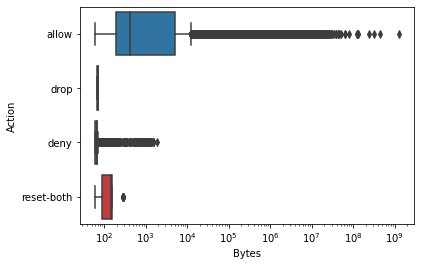

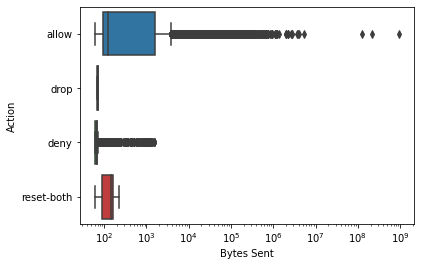

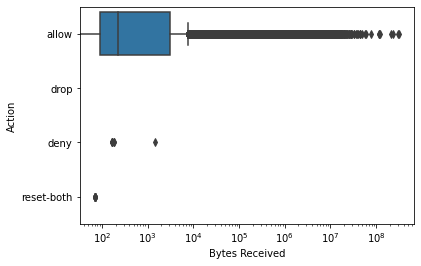

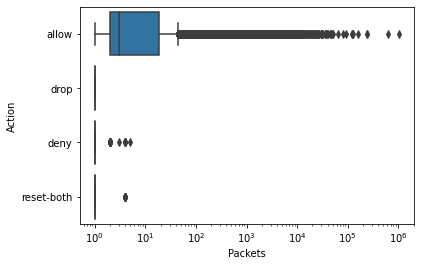

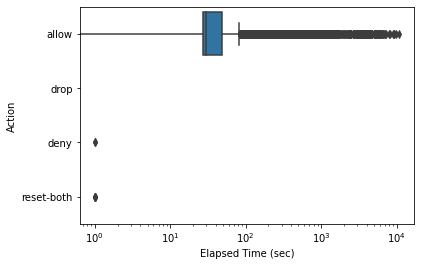

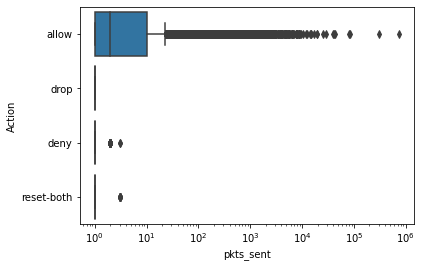

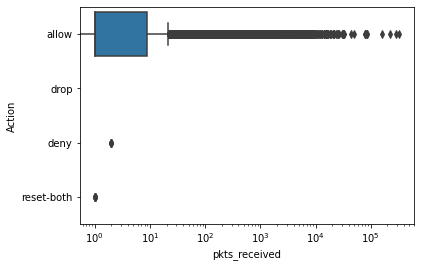

In [72]:
for f in features_num:
    g = sns.boxplot(x=f,y="Action",data=data)
    g.set_xscale("log")
    plt.show()

In [26]:
# Verificacion valores NA
faltante =((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)
faltante

Source Port             0.0
Destination Port        0.0
NAT Source Port         0.0
NAT Destination Port    0.0
Action                  0.0
Bytes                   0.0
Bytes Sent              0.0
Bytes Received          0.0
Packets                 0.0
Elapsed Time (sec)      0.0
pkts_sent               0.0
pkts_received           0.0
dtype: float64